In [21]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data=scipy.io.loadmat('fZ_data_assigment_2023.mat')
f=data['f'].flatten()   
Z=data['Z'].flatten() 
C0=1.4469e-12  
w=2*np.pi*f
absoZ=np.abs(Z)
i_fs=np.argmin(absoZ)
i_fp=np.argmax(absoZ)
fs=f[i_fs]
fp=f[i_fp]
ws=w[i_fs]  
wp=w[i_fp]  
delf=fp-fs
keff=(fp**2 - fs**2)/(fp**2)
Cm=(keff/(1-keff))*C0
Lm=1/(ws**2 *Cm)
derivat=np.gradient(np.angle(Z))/np.gradient(w)
Qs=(ws/2)*np.abs(derivat[i_fs])
Qp=(wp/2)*np.abs(derivat[i_fp])
Rm=(wp*Lm)/Qp
Rs=(ws*Lm/Qs)-Rm

In [24]:
print(f"Rs={Rs:.3f} Ohms")
print(f"Rm={Rm:.3f} Ohms")
print(f"fs={fs*1e-9:.4f} GHz")
print(f"Cm={Cm*1e15:.4f} fF")
print(f"Lm={Lm*1e6:.4f} uH")
print(f"fp={fp*1e-9:.4f} GHz")
print(f"Qs={Qs:.1f}")
print(f"delta f={delf*1e-6:.4f} MHz")
print(f"keff^2={keff*100:.3f}")
print(f"Qp={Qp:.1f}")

Rs=0.792 Ohms
Rm=0.696 Ohms
fs=2.1999 GHz
Cm=88.1374 fF
Lm=0.0594 uH
fp=2.2659 GHz
Qs=551.9
delta f=66.0132 MHz
keff^2=5.742
Qp=1215.5


In [25]:
def Zbvd(ff,C0,R0,Rs,Lm,Rm,Cm):
    Zfi=Rs+(1/(1/(1/(1j*(2*np.pi*ff)*C0))+1/(Rm+1j*(2*np.pi*ff)*Lm+1/(1j*(2*np.pi*ff)*Cm))))
    return Zfi
Zfit=Zbvd(f,C0,0,Rs,Lm,Rm,Cm)


Plotting data vs. fit...


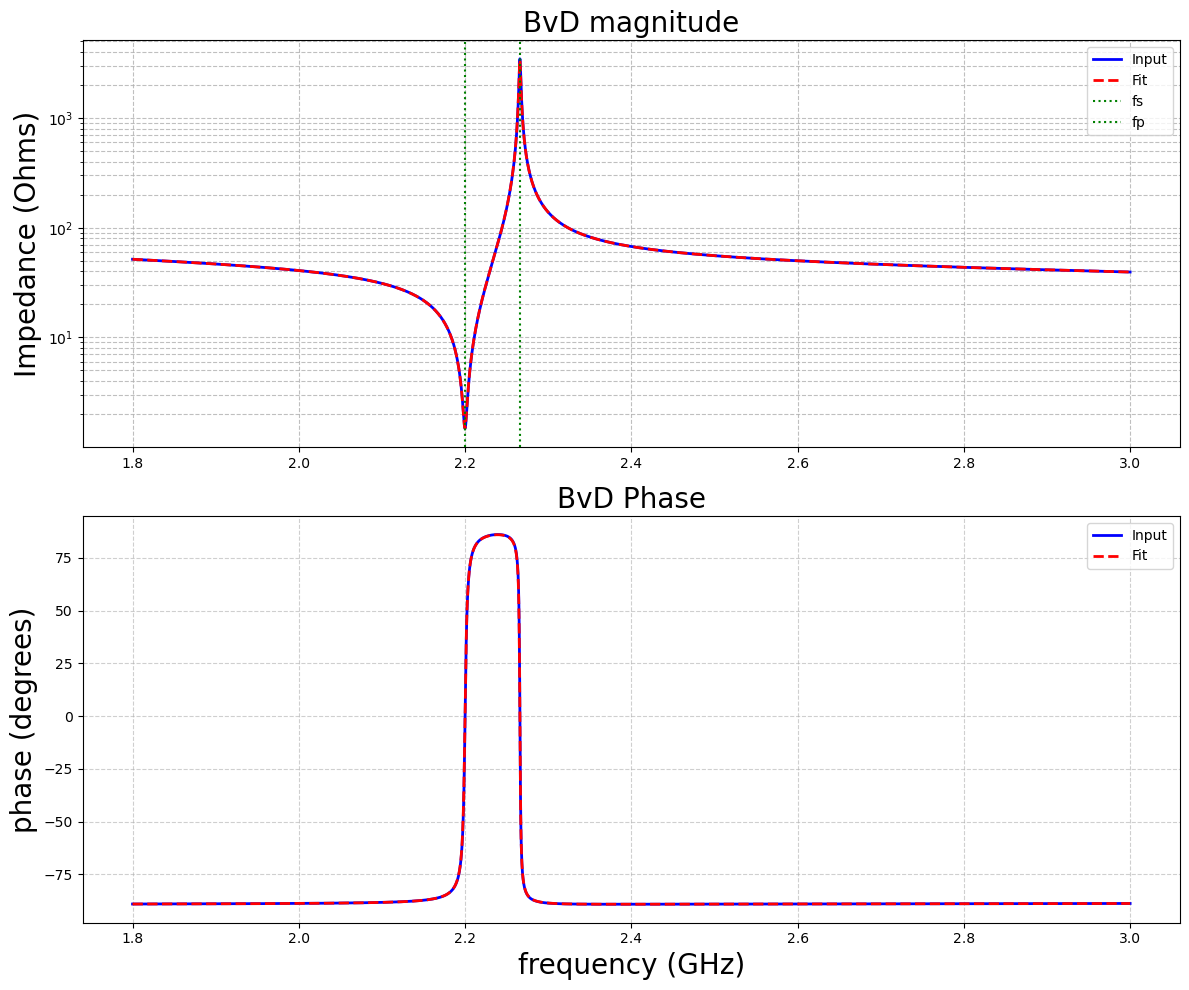

In [31]:
# Plotting the results
print("\nPlotting data vs. fit...")
plt.figure(figsize=(12, 10))

# Subplot 1: Impedance Magnitude (log scale)
plt.subplot(2, 1, 1)
plt.semilogy(f * 1e-9, absoZ, 'b-', label='Input', linewidth=2)
plt.semilogy(f * 1e-9, np.abs(Zfit), 'r--', label='Fit', linewidth=2)
plt.axvline(fs * 1e-9, color='green', linestyle=':', label=f'fs')
plt.axvline(fp * 1e-9, color='green', linestyle=':', label=f'fp')
plt.ylabel('Impedance (Ohms)', fontsize=20)
plt.title('BvD magnitude', fontsize=20)
plt.grid(which='both', linestyle='--', alpha=0.8)
plt.legend()

# Subplot 2: Impedance Phase (linear scale)
plt.subplot(2, 1, 2)
plt.plot(f * 1e-9, np.angle(Z, deg=True), 'b-', label='Input', linewidth=2)
plt.plot(f * 1e-9, np.angle(Zfit, deg=True), 'r--', label='Fit', linewidth=2)
plt.ylabel('phase (degrees)', fontsize=20)
plt.xlabel('frequency (GHz)', fontsize=20)
plt.title('BvD Phase', fontsize=20)
plt.grid(which='both', linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()